In [2]:
#import libraries
#import numpy and pandas
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
#use the plt inside the notebook
%matplotlib inline
#T1 level models
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve , auc
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP

In [3]:
#pkl file directory
pkl_dir = './dataset/'
pkl_name_x0 = 'trainX0.pkl'
pkl_name_y = 'trainY.pkl'
#load the data
data_X = pd.read_pickle(pkl_dir+pkl_name_x0)
data_Y = pd.read_pickle(pkl_dir+pkl_name_y)

In [4]:
#pkl file directory
pkl_dir = './dataset/'
pkl_name_xt = 'testX0.pkl'
pkl_name_yt = 'testY.pkl'
#load the data
data_Xt = pd.read_pickle(pkl_dir+pkl_name_xt)
data_Yt = pd.read_pickle(pkl_dir+pkl_name_yt)

In [5]:
#organize the data
#distribute the label into 2 group
x_train = []
y_train = []
x_test  = []
y_test  = []
for i in range(3000):
    #binary label 0 stand for no tumor and 1 stands for have tumor
    if data_Y.tumor_type[i] == 'no':
        y_train.append(0)
    elif data_Y.tumor_type[i] == 'meningioma':
        y_train.append(1)
    elif data_Y.tumor_type[i] == 'glioma':
        y_train.append(2)
    elif data_Y.tumor_type[i] == 'pituitary':
        y_train.append(3)
    else:
        y_train.append(-1)

for i in range(200):
    #binary label 0 stand for no tumor and 1 stands for have tumor
    if data_Yt.tumor_type[i] == 'no':
        y_test.append(0)
    elif data_Yt.tumor_type[i] == 'meningioma':
        y_test.append(1)
    elif data_Yt.tumor_type[i] == 'glioma':
        y_test.append(2)
    elif data_Yt.tumor_type[i] == 'pituitary':
        y_test.append(3)
    else:
        y_test.append(-1)
    

In [6]:
Xtrain = data_X.T
Ytrain = np.array(y_train)
Xtest = data_Xt.T
Ytest = np.array(y_test)

In [19]:
Xtrain.shape

(3000, 262144)

In [20]:
Ytrain.shape

(3000,)

In [21]:
Xtest.shape

(200, 262144)

In [22]:
Ytest.shape

(200,)

In [30]:
model0 = RFC(80, class_weight ='balanced',max_depth= None, min_samples_split= 2)
model0.fit(Xtrain,Ytrain)
Ypredict = model0.predict(Xtest)

acc = metrics.accuracy_score(Ytest,Ypredict)
prec = metrics.precision_score(Ytest,Ypredict,average='weighted')
recall = metrics.recall_score(Ytest,Ypredict,average='weighted')
f1 = metrics.f1_score(Ytest,Ypredict,average='weighted')

Yscore = model0.predict_proba(Xtest)

In [31]:
acc,prec,recall,f1

(0.895, 0.8973140313295933, 0.895, 0.8943404882154882)

In [11]:
Ytest_m = np.empty((200,4))
for i in range(200):
    if Ytest[i] == 0:
        Ytest_m[i,0] = 1
        Ytest_m[i,1] = 0
        Ytest_m[i,2] = 0
        Ytest_m[i,3] = 0
    elif Ytest[i] == 1:
        Ytest_m[i,0] = 0
        Ytest_m[i,1] = 1
        Ytest_m[i,2] = 0
        Ytest_m[i,3] = 0
    elif Ytest[i] == 2:
        Ytest_m[i,0] = 0
        Ytest_m[i,1] = 0
        Ytest_m[i,2] = 1
        Ytest_m[i,3] = 0
    elif Ytest[i] == 3:
        Ytest_m[i,0] = 0
        Ytest_m[i,1] = 0
        Ytest_m[i,2] = 0
        Ytest_m[i,3] = 1


In [56]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Ytest_m[:,i], Yscore[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

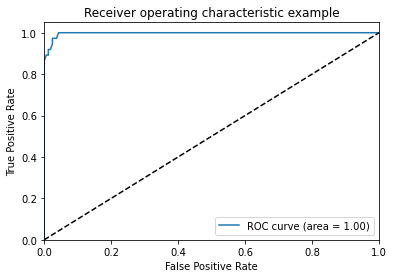

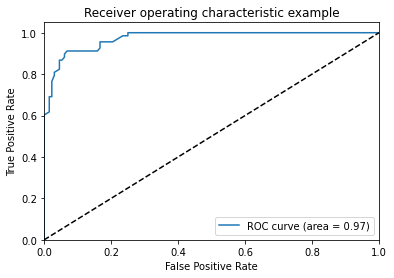

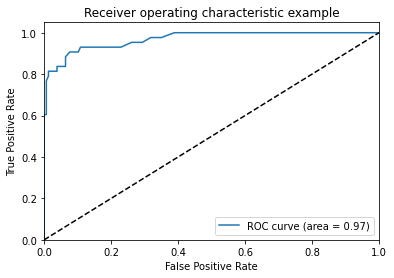

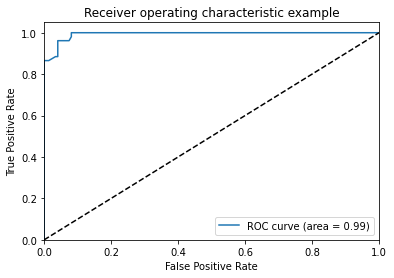

<Figure size 432x288 with 0 Axes>

In [58]:
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


plt.savefig('./figs/rf2.svg')

In [ ]:
model1 = SVC(kernel='rbf',class_weight='balanced',probability = True,C=4.5) #,gamma=0.0005
model1.fit(Xtrain[0:2000],Ytrain[0:2000])
Ypredict = model1.predict(Xtest)

acc = metrics.accuracy_score(Ytest,Ypredict)
prec = metrics.precision_score(Ytest,Ypredict,average='weighted')
recall = metrics.recall_score(Ytest,Ypredict,average='weighted')
f1 = metrics.f1_score(Ytest,Ypredict,average='weighted')

Yscore = model1.predict_proba(Xtest)

In [8]:
Yscore = model1.predict_proba(Xtest)

In [9]:
acc,prec,recall,f1

(0.865, 0.8653788259862205, 0.865, 0.8639848497564542)

In [12]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Ytest_m[:,i], Yscore[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

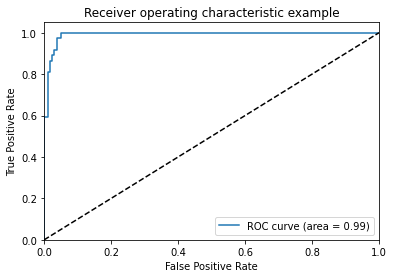

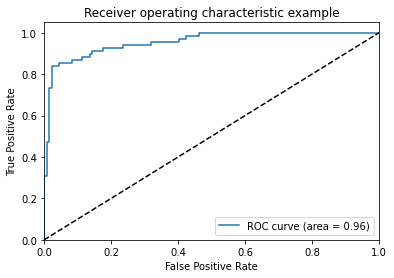

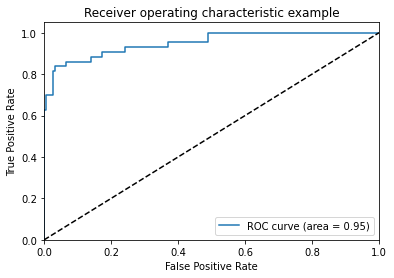

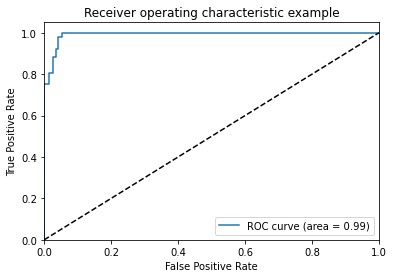

<Figure size 432x288 with 0 Axes>

In [13]:
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


plt.savefig('./figs/svm2.svg')

In [15]:
model2 = MLP(hidden_layer_sizes = (560,), activation = 'relu',solver = 'adam',learning_rate_init=0.0005,alpha=0.0001)
model2.fit(Xtrain,Ytrain)
Ypredict = model2.predict(Xtest)

acc = metrics.accuracy_score(Ytest,Ypredict)
prec = metrics.precision_score(Ytest,Ypredict,average='weighted')
recall = metrics.recall_score(Ytest,Ypredict,average='weighted')
f1 = metrics.f1_score(Ytest,Ypredict,average='weighted')

Yscore = model2.predict_proba(Xtest)

In [16]:
acc,prec,recall,f1

(0.64, 0.7552769742239108, 0.64, 0.628967032967033)

In [17]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(Ytest_m[:,i], Yscore[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

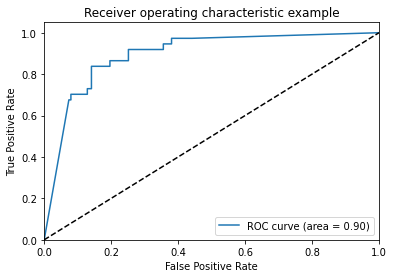

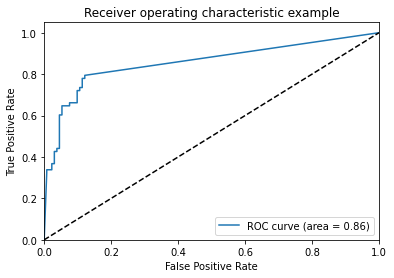

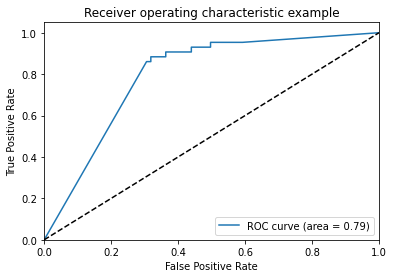

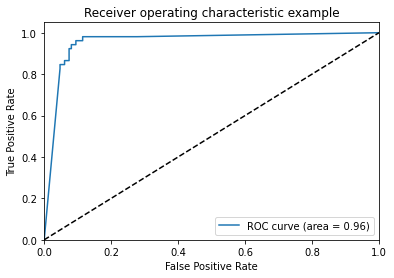

<Figure size 432x288 with 0 Axes>

In [18]:
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


plt.savefig('./figs/mlp2.svg')